In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
signal = pd.Series(np.random.uniform(-1,1,10000))
noise = pd.Series(np.random.uniform(-1,1,10000))

In [3]:
df = pd.DataFrame({'signal': signal, 'noise': noise})

In [4]:
df['y_prob'] = pd.Series([abs((x+1)*x*(x-1)) for x in df['signal']])

In [5]:
df['y'] = pd.Series(np.random.binomial(1, df['y_prob']))

In [6]:
df.head(20)

,signal,noise,y_prob,y
0,0.181518,0.441392,0.175537,0
1,-0.704528,0.420588,0.354829,0
2,-0.313320,-0.889433,0.282562,1
3,-0.357486,0.519803,0.311800,0
4,-0.347017,-0.366137,0.305229,0
5,-0.123380,-0.318498,0.121502,0
6,-0.266090,0.791423,0.247250,0
7,-0.324321,0.149351,0.290207,0
8,-0.653491,-0.243934,0.374417,0
9,-0.097262,0.420380,0.096342,0


In [7]:
X = df[['signal', 'noise']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [8]:
max_depth_list = list(range(1,30))

In [10]:
bv_dict = {'error': [],
           'max_depth': [],
           'type': []}

for md in max_depth_list:
    dt_clf = DecisionTreeClassifier(max_depth=md)
    dt_clf.fit(X_train, y_train)

    preds_train = dt_clf.predict_proba(X_train)[:,1]
    bv_dict['error'].append(1 - roc_auc_score(y_train, preds_train))
    bv_dict['type'].append('train')
    bv_dict['max_depth'].append(md)

    preds_test = dt_clf.predict_proba(X_test)[:,1]
    bv_dict['error'].append(1 - roc_auc_score(y_test, preds_test))
    bv_dict['type'].append('test')
    bv_dict['max_depth'].append(md)

In [11]:
bv_df = pd.DataFrame(bv_dict)

<AxesSubplot: xlabel='max_depth', ylabel='error'>

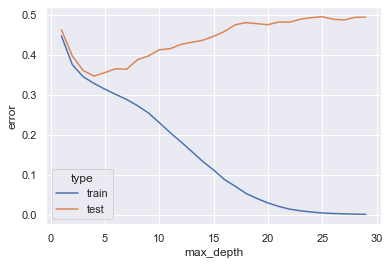

In [12]:
#!pip install seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data

# Plot the responses for different events and regions
sns.lineplot(x="max_depth", y="error",
             hue="type",
             data=bv_df)